# League of Legends Item Balancing

### Capstone Project 1: In-Depth Analysis

This section will be for some final statistical analyses and some machine learning models to help me understand the influence of various item attributes on an item's win rate and pick rate.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import re
import seaborn as sns
%matplotlib inline

sns.set()

In [2]:
from itertools import product

leagues = ['GOLD', 'PLATINUM', 'DIAMOND']
divisions = ['IV', 'III', 'II', 'I']

leagues_and_divisions = list(product(leagues, divisions))
leagues_and_divisions

[('GOLD', 'IV'),
 ('GOLD', 'III'),
 ('GOLD', 'II'),
 ('GOLD', 'I'),
 ('PLATINUM', 'IV'),
 ('PLATINUM', 'III'),
 ('PLATINUM', 'II'),
 ('PLATINUM', 'I'),
 ('DIAMOND', 'IV'),
 ('DIAMOND', 'III'),
 ('DIAMOND', 'II'),
 ('DIAMOND', 'I')]

In [3]:
def collect_all_dfs(leagues, divisions, filepath_prefix):
    """
    For a set of files
    Given by the filepath prefix and the set of leagues and divisions
    Collect all files in the set and return the overall dataframe
    """
    
    df_list = []
    
    for league in leagues:
        for division in divisions:
            filepath = filepath_prefix + league + '_' + division + '.csv'
            
            df = pd.read_csv(filepath, index_col=0)
            df.loc[:, 'league'] = league
            df.loc[:, 'division'] = division
            
            df_list.append(df)
    
    full_df = pd.concat(df_list, ignore_index=True, sort=False)#.reset_index(drop=True)
    
    return full_df

In [4]:
full_match_df = collect_all_dfs(leagues, divisions, '../data/matches_')

C:\Users\sebia\Miniconda2\lib\site-packages\IPython\core\interactiveshell.py:2818: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [5]:
full_match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140172 entries, 0 to 140171
Columns: 144 entries, championId to division
dtypes: bool(3), float64(59), int64(73), object(9)
memory usage: 151.2+ MB


In [6]:
full_match_df.head()

,championId,highestAchievedSeasonTier,participantId,spell1Id,spell2Id,stats.assists,stats.champLevel,stats.combatPlayerScore,stats.damageDealtToObjectives,stats.damageDealtToTurrets,...,timeline.xpPerMinDeltas.20-30,timeline.creepsPerMinDeltas.30-end,timeline.csDiffPerMinDeltas.30-end,timeline.damageTakenDiffPerMinDeltas.30-end,timeline.damageTakenPerMinDeltas.30-end,timeline.goldPerMinDeltas.30-end,timeline.xpDiffPerMinDeltas.30-end,timeline.xpPerMinDeltas.30-end,league,division
0,78,UNRANKED,1,4,12,5,13,0,4207,2669,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GOLD,IV
1,236,UNRANKED,2,4,7,3,9,0,1935,1508,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GOLD,IV
2,412,GOLD,3,4,14,9,10,0,473,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GOLD,IV
3,254,GOLD,4,4,11,7,13,0,5893,1369,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GOLD,IV
4,103,GOLD,5,14,4,4,13,0,508,452,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GOLD,IV


In [7]:
champions_min_df = pd.read_csv('../data/champions_min_9.8.1.csv', encoding='utf-8', index_col=0)

items_df = pd.read_csv('../data/items_9.8.1.csv', encoding='utf-8', index_col=0)
items_df['tags'] = [re.findall('[A-Za-z]\w*', items_df.loc[item_id, 'tags']) for item_id in items_df.index]

overall_item_stats = pd.read_csv('../data/item_stats_ALL.csv', encoding='utf-8', index_col=0)
overall_item_stats = overall_item_stats.join(items_df[['name', 'total_gold', 'full_item', 'tags']])

#tag_based_stats_df = pd.read_csv('../data/tag_based_stats_8.22.1.csv', encoding='utf-8', index_col=0)

#timing_df = pd.read_csv('../data/item_timing_8.22.1.csv', encoding='utf-8', index_col=0)

Most of the raw data I intend to use is in the Match dataframe.

Here is a sample of it.

In [8]:
full_match_df.loc[:,'stats.item0':'stats.item6'].head(10)

,stats.item0,stats.item1,stats.item2,stats.item3,stats.item4,stats.item5,stats.item6
0,1054,3068,1001,3025,1029,1029,3340
1,3153,1055,3044,1001,0,0,3340
2,3069,3117,3190,0,2010,0,3364
3,3047,1412,3078,3052,0,0,3364
4,1056,3165,0,2031,3285,3020,3340
5,2033,1031,3111,1011,3078,1082,3340
6,3147,3401,3142,3117,1038,0,3364
7,1416,3077,3144,3078,3111,1042,3340
8,1056,3285,3020,3916,0,0,3363
9,1037,3095,3031,3006,3094,3035,3340


The other important dataframe has descriptive statistics for each item, and some identifiers from the Items table.

In [9]:
overall_item_stats.tail()

,count,pick_rate,spread,wins,win_rate,name,total_gold,full_item,tags
item_id,,,,,,,,,
3905,1640,0.011700,59,934.0,0.569512,Twin Shadows,2400.0,True,"[SpellDamage, Active, CooldownReduction, Slow,..."
3907,1086,0.007748,57,646.0,0.594843,Spellbinder,2900.0,True,"[SpellDamage, Active, NonbootsMovement]"
3916,3047,0.021738,73,1602.0,0.525763,Oblivion Orb,1600.0,False,"[Health, MagicPenetration, SpellDamage]"
3930,4,0.000029,3,0.0,0.000000,NaN,NaN,NaN,NaN
3931,1,0.000007,1,1.0,1.000000,NaN,NaN,NaN,NaN


One of the best-visualized results from my EDA was the graph of win-rate outliers.

<img src='../analysis_images/win_rate_diff_abnormal.png'>

However, I realized there is an interesting noise that can mask the correlation between balance and win rate.

It involves the pick rate. In essence, if the same item is built on both teams, one of them is guaranteed to win, and one to lose, and so the win rate for that item drifts towards 0.50. The figure below illustrates this.

<img src='../analysis_images/full_item_win_rate_vs_pick_rate.png'>

The first step I would like to take in this analysis is to examine this problem more closely. 

I need to check the win rate of each item ONLY in games when there are more of the item built on one team than the other.

In [10]:
# Function to get the unmasked number of game results for each item
# For a game and an item, check how many of the item each team built
# For the team with the higher number of purchases of that item
# Return their win result as many times as they built the item in excess of the other team

# game_num should start at 0

def unmask_item_wins(game_num, item_id):
    # Inside the match dataframe
    # Each game is sequential
    # Each team is grouped together
    """
    if (game_num > len(full_match_df) / 10):
        raise ValueError('Game number is out of bounds.\
                          There are not that many games.')
    """
    team_1_item_count = 0
    team_2_item_count = 0
    
    # Win result for each team
    # Team 1 is just the first win / loss result
    # Team 2 is the opposite
    # No ties in League
    team_1_win = full_match_df.loc[full_match_df['game_id'] == game_num, 'stats.win'].values[0]
    team_2_win = not team_1_win
    
    # See how many of the item each team built
    # Slice on game number and the first win / loss result
    team_1_items = full_match_df.loc[(full_match_df['game_id'] == game_num) & 
                                     (full_match_df['stats.win'] == team_1_win),
                                     'stats.item0' : 'stats.item6']\
                                  .stack().reset_index(drop=True).value_counts()
    
    # Slice on game number and the other win / loss result
    team_2_items = full_match_df.loc[(full_match_df['game_id'] == game_num) &
                                     (full_match_df['stats.win'] == team_2_win),
                                     'stats.item0' : 'stats.item6']\
                                 .stack().reset_index(drop=True).value_counts()
    
    # Check to make sure the requested item was built at all
    if (item_id in team_1_items):
        team_1_item_count = team_1_items[item_id]
    
    if (item_id in team_2_items):
        team_2_item_count = team_2_items[item_id]
    
    # Logic to return the proper value based on who won the game
    
    
    # If each team built the same number of the item, we can't use this game
    results = []
    
    # Want to return the game result for each time the item was built in excess of the other team
    if (team_1_item_count > team_2_item_count):
        results = [team_1_win for _ in range(team_1_item_count - team_2_item_count)]
    
    if (team_1_item_count < team_2_item_count):
        results = [team_2_win for _ in range(team_2_item_count - team_1_item_count)]
        
    return results

In [37]:
overall_item_stats.loc[3083]

count                                                  1461
pick_rate                                         0.0104229
spread                                                   69
wins                                                    856
win_rate                                             0.5859
name                                         Warmog's Armor
total_gold                                             2850
full_item                                              True
tags               [Health, HealthRegen, CooldownReduction]
count_unmasked                                            0
wr_unmasked                                               0
wr_std_unmasked                                           0
Name: 3083, dtype: object

In [38]:
warmogs_og_data = []
warmogs_norm_data = []

Now that this loop has been run, I don't need to run it again (since I saved the table). It takes a couple hours, uses only a little RAM, and about 30% of my CPU.

In [39]:
# Loop to find unmasked match results
# Will attach average win rate and std win rate to items_df

for item_id in overall_item_stats.index.values:
    item_wins_unmasked = []
    
    # Get match results
    for match in full_match_df.game_id.unique():
        item_wins_unmasked.append(unmask_item_wins(match, item_id))
    
    # Concatenate results
    # for match wins in item_wins_unmasked
    #     for result in match wins
    #         append(result)
        
    item_wins_unmasked = [result for match_wins in item_wins_unmasked for result in match_wins]
        
    count = len(item_wins_unmasked)
    mean = np.mean(item_wins_unmasked) if count != 0 else 0
    std = np.sqrt(mean * (1 - mean) / count) if count != 0 else 0
    
    overall_item_stats.loc[item_id, 'count_unmasked'] = count
    overall_item_stats.loc[item_id, 'wr_unmasked'] = mean
    overall_item_stats.loc[item_id, 'wr_std_unmasked'] = std

In [37]:
overall_item_stats.loc[3083]

count                                                  1461
pick_rate                                         0.0104229
spread                                                   69
wins                                                    856
win_rate                                             0.5859
name                                         Warmog's Armor
total_gold                                             2850
full_item                                              True
tags               [Health, HealthRegen, CooldownReduction]
count_unmasked                                         1359
wr_unmasked                                        0.593083
wr_std_unmasked                                    0.013326
Name: 3083, dtype: object

In [41]:
overall_item_stats.to_csv('../data/item_stats_ALL_unmasked.csv', encoding='utf-8')

In [11]:
overall_item_stats = pd.read_csv('../data/item_stats_ALL_unmasked.csv', encoding='utf-8', index_col=0)
overall_item_stats['tags'] = items_df['tags']

Now that I've updated the item statistics dataframe, lets compare the win rate and the "unmasked" win rate as functions of pick rate.

Let's recall that we want to avoid some kinds of items.

In [12]:
consumable = [True if (type(tags) == list and 'Consumable' in tags) else False for tags in overall_item_stats['tags']]

lane_items = [True if (type(tags) == list and 'Lane' in tags) else False for tags in overall_item_stats['tags']]

boots = [True if (type(tags) == list and 'Boots' in tags) else False for tags in overall_item_stats['tags']]

trinkets = [True if (type(tags) == list and 'Trinket' in tags) else False for tags in overall_item_stats['tags']]

jungle_items = [True if (type(tags) == list and 'Jungle' in tags) else False for tags in overall_item_stats['tags']]

other_no_no_ids = [2010, 2057, 2403]
other_edge_cases = [True if id in other_no_no_ids else False for id in overall_item_stats.reset_index()['item_id']]

edge_cases = [cons or lane or other or boot or trinket or jungle for cons, lane, other, boot, trinket, jungle in
              zip(consumable, lane_items, other_edge_cases, boots, trinkets, jungle_items)]
no_edge_cases = [not case for case in edge_cases]

In [13]:
full_items_df = overall_item_stats[(overall_item_stats['full_item'] == True) &
                                   (no_edge_cases) &
                                   (overall_item_stats['count'] > 10)]

full_item_avg_win_rate = (full_items_df['win_rate'] *\
                          full_items_df['count']).sum()\
                              / full_items_df['count'].sum()

full_item_avg_wr_unmasked = (full_items_df['wr_unmasked'] *\
                             full_items_df['count_unmasked']).sum()\
                                 / full_items_df['count_unmasked'].sum()
print("Average Win Rate for Full Items Across all Games:", full_item_avg_win_rate)
print("Average Win Rate for Full Items Over Games Without Even Item Counts", full_item_avg_wr_unmasked)

('Average Win Rate for Full Items Across all Games:', 0.55119179358744985)
('Average Win Rate for Full Items Over Games Without Even Item Counts', 0.5669844264364936)


The unmasked win rate is much lower than the masked, which is strange. 

What do the numbers look like for unfinished items? Both very close to 50%.

In [14]:
no_edge_items_df = overall_item_stats[(no_edge_cases) &
                                      (overall_item_stats['count'] > 10)]

avg_win_rate = (no_edge_items_df['win_rate'] *\
                no_edge_items_df['count']).sum()\
                    / no_edge_items_df['count'].sum()

avg_wr_unmasked = (no_edge_items_df['wr_unmasked'] *\
                   no_edge_items_df['count_unmasked']).sum()\
                    / no_edge_items_df['count_unmasked'].sum()
print("Average Win Rate for Items Across all Games:", avg_win_rate)
print("Average Win Rate for Items Over Games Without Even Item Counts", avg_wr_unmasked)

('Average Win Rate for Items Across all Games:', 0.50641836125456252)
('Average Win Rate for Items Over Games Without Even Item Counts', 0.508903586254562)


I am wondering if this set of games is longer on average. Longer games will lessen the bias against incomplete items, which also moves full item win rates closer to 50%. Seems like a rather dramatic shift, though.

Even so, the masking is still supposed to drag win rates toward 50% by making a more similar number of wins and losses. Removing this effect should always push win rates away from 50%.

### Checking for Problems

Indices in the match df weren't unique: no, I used reset_index(), so that shouldn't be the issue.

Unmasking function not working correctly? No, seems fine upon manual inspection. 

Something wrong with the full_match_df? I didn't drop the old index, I'm wondering if that made something ambiguous. 

full_match_df wasn't ignoring the old indices when concatenation happened, so that might have reordered the data and screwed up my "matches." This was the bug! I redid the last step of data acquisition, adding in a column for the game number, so I can insure I know who was in the same game and also test on that instead of an index of the dataframe.

### Masked Win Rate

Here is the plot from before, Item Win Rates with the aforementioned masking.

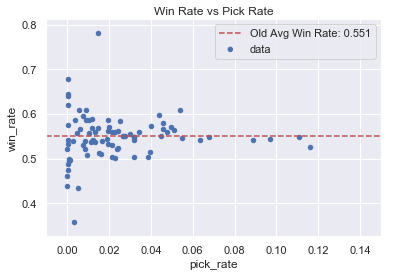

In [15]:
full_items_df.plot('pick_rate', 'win_rate', kind='scatter',
                   xlim=[-0.01, 0.15], label='data',
                   title='Win Rate vs Pick Rate')

plt.plot(np.linspace(-0.01, 0.15, 50), np.full(50, avg_win_rate),
         'r--', label=('Old Avg Win Rate: %0.3f' % avg_win_rate))
plt.legend()

### Unmasked Win Rates

And here are the Item Win Rates unmasked.

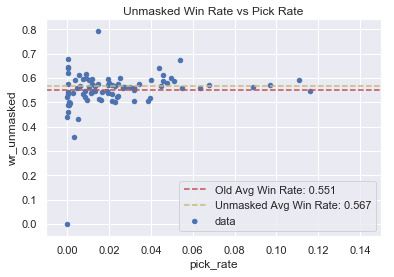

In [16]:
full_items_df.plot('pick_rate', 'wr_unmasked', kind='scatter',
                   xlim=[-0.01, 0.15], label='data',
                   title='Unmasked Win Rate vs Pick Rate')

plt.plot(np.linspace(-0.01, 0.15, 50), np.full(50, full_item_avg_win_rate),
         'r--', label=('Old Avg Win Rate: %0.3f' % full_item_avg_win_rate))
plt.plot(np.linspace(-0.01, 0.15, 50), np.full(50, full_item_avg_wr_unmasked),
         'y--', label=('Unmasked Avg Win Rate: %0.3f' % full_item_avg_wr_unmasked))
plt.legend()
plt.savefig('../analysis_images/um_win_rate_vs_pick_rate.png')

In [17]:
full_items_df['unmasking_diff'] = full_items_df['wr_unmasked'] - full_items_df['win_rate']

C:\Users\sebia\Miniconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


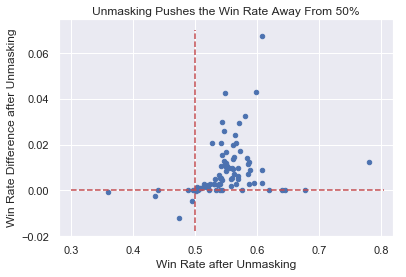

In [18]:
full_items_df.plot(x='win_rate', y='unmasking_diff', kind='scatter',
                  title='Unmasking Pushes the Win Rate Away From 50%',
                  xlim=[0.28, 0.82], ylim=[-0.02, 0.075])

plt.ylabel('Win Rate Difference after Unmasking')
plt.xlabel('Win Rate after Unmasking')

plt.plot(np.linspace(0.3, 0.805, 50), np.full(50, 0.0), 'r--')
plt.plot(np.full(50, 0.5), np.linspace(-0.0175, 0.07), 'r--')
plt.savefig('../analysis_images/win_rate_unmasking.png')

As expected, the unmasking pushed win rates away from 0.50, since the masking drew win rates into 0.50.

Let's remake the plot of win rate outliers and see if it's different now.

In [19]:
wr_stats_df = overall_item_stats[['count', 'pick_rate', 'spread', 'wins', 'win_rate',
                                  'count_unmasked', 'wr_unmasked', 'wr_std_unmasked',
                                  'full_item', 'name', 'total_gold', 'tags']]

wr_stats_df.loc[:, 'wr_diff'] = wr_stats_df['win_rate'] - full_item_avg_win_rate
wr_stats_df.loc[:, 'wr_std'] = np.sqrt(full_item_avg_win_rate * (1 - full_item_avg_win_rate) 
                                / wr_stats_df['count'])
wr_stats_df.loc[:, 'CI95'] = wr_stats_df['wr_std'] * 1.96

wr_stats_df.loc[:, 'wr_um_diff'] = wr_stats_df['wr_unmasked'] - full_item_avg_wr_unmasked
wr_stats_df.loc[:, 'CI95_um'] = wr_stats_df['wr_std_unmasked'] * 1.96

C:\Users\sebia\Miniconda2\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\sebia\Miniconda2\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [20]:
wr_stats_df.head()

,count,pick_rate,spread,wins,win_rate,count_unmasked,wr_unmasked,wr_std_unmasked,full_item,name,total_gold,tags,wr_diff,wr_std,CI95,wr_um_diff,CI95_um
item_id,,,,,,,,,,,,,,,,,
0,79652,0.568245,144,34236.0,0.429820,25432.0,0.280002,0.002816,NaN,NaN,NaN,NaN,-0.121372,0.001762,0.003454,-0.286983,0.005518
1001,6182,0.044103,143,2189.0,0.354093,4265.0,0.288159,0.006935,False,Boots of Speed,300.0,[Boots],-0.197099,0.006326,0.012399,-0.278825,0.013593
1004,1507,0.010751,84,558.0,0.370272,1425.0,0.362807,0.012737,False,Faerie Charm,125.0,[ManaRegen],-0.180920,0.012812,0.025112,-0.204177,0.024964
1006,636,0.004537,84,250.0,0.393082,618.0,0.391586,0.019634,False,Rejuvenation Bead,150.0,[HealthRegen],-0.158110,0.019722,0.038655,-0.175399,0.038484
1011,3232,0.023057,106,1642.0,0.508045,2856.0,0.509454,0.009354,False,Giant's Belt,1000.0,[Health],-0.043147,0.008749,0.017148,-0.057531,0.018335


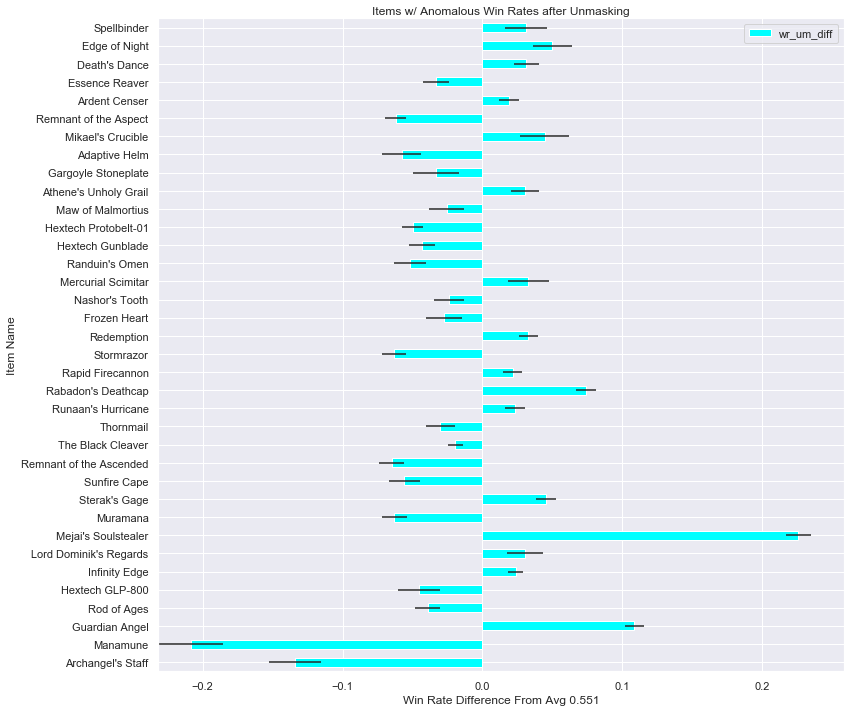

In [21]:
plt.rcParams["figure.figsize"] = (12, 10)
wr_stats_df[(wr_stats_df['full_item'] == True) &
            (no_edge_cases) &
            (wr_stats_df['count_unmasked'] > 10) &
            (wr_stats_df['wr_um_diff'].abs() > wr_stats_df['CI95_um'])
           ].plot(y='wr_um_diff', x='name', kind='barh',
                        xerr='wr_std_unmasked', color='cyan',
                        title='Items w/ Anomalous Win Rates after Unmasking')

plt.xlabel('Win Rate Difference From Avg ' + ('%0.3f' % full_item_avg_win_rate))
plt.ylabel('Item Name')
plt.tight_layout()
plt.savefig('../analysis_images/wr_diff_unmasked_abnormal.png')

In [22]:
wr_stats_df[(wr_stats_df['full_item'] == True) &
            (no_edge_cases) &
            (wr_stats_df['count_unmasked'] > 10) &
            (wr_stats_df['wr_um_diff'].abs() > wr_stats_df['CI95_um'])
           ]

,count,pick_rate,spread,wins,win_rate,count_unmasked,wr_unmasked,wr_std_unmasked,full_item,name,total_gold,tags,wr_diff,wr_std,CI95,wr_um_diff,CI95_um
item_id,,,,,,,,,,,,,,,,,
3003,714,0.005094,32,311.0,0.435574,695.0,0.433094,0.018796,True,Archangel's Staff,3200.0,"[SpellDamage, Mana, ManaRegen, CooldownReduction]",-0.115618,0.018614,0.036483,-0.133891,0.036839
3004,429,0.003061,13,154.0,0.358974,427.0,0.358314,0.023205,True,Manamune,2400.0,"[Damage, Mana, ManaRegen, OnHit]",-0.192217,0.024013,0.047066,-0.208671,0.045482
3026,7564,0.053962,92,4600.0,0.608144,4671.0,0.675444,0.006851,True,Guardian Angel,2800.0,"[Armor, Damage]",0.056952,0.005719,0.011209,0.108460,0.013427
3027,3439,0.024534,61,1805.0,0.524862,3088.0,0.527850,0.008984,True,Rod of Ages,2700.0,"[Health, HealthRegen, Mana, ManaRegen, SpellDa...",-0.026330,0.008481,0.016623,-0.039135,0.017608
3030,1179,0.008411,58,614.0,0.520780,1127.0,0.521739,0.014880,True,Hextech GLP-800,2800.0,"[SpellDamage, Mana, Active, CooldownReduction,...",-0.030411,0.014485,0.028391,-0.045245,0.029164
3031,15518,0.110707,56,8502.0,0.547880,8211.0,0.590671,0.005426,True,Infinity Edge,3400.0,"[CriticalStrike, Damage]",-0.003312,0.003993,0.007826,0.023687,0.010636
3036,1645,0.011736,57,968.0,0.588450,1488.0,0.597446,0.012713,True,Lord Dominik's Regards,2800.0,"[Damage, ArmorPenetration]",0.037258,0.012263,0.024036,0.030462,0.024918
3041,2090,0.014910,86,1631.0,0.780383,1998.0,0.792793,0.009067,True,Mejai's Soulstealer,1400.0,"[SpellDamage, Mana]",0.229191,0.010879,0.021324,0.225808,0.017772
3042,2980,0.021260,13,1502.0,0.504027,2938.0,0.504084,0.009224,True,Muramana,2400.0,[OnHit],-0.047165,0.009111,0.017858,-0.062900,0.018079


From the first win rate abnormality plot, the suspect items were (in order of win rate abnormality) (the average win rate occurs between Trinity Force and Rapidfire Cannon):

In [33]:
abnormal_items = wr_stats_df[(wr_stats_df['full_item'] == True) &
                             (no_edge_cases) &
                             (wr_stats_df['count'] > 10) &
                             (wr_stats_df['wr_diff'].abs() > wr_stats_df['CI95'])
                            ].sort_values('wr_diff', ascending=False)['name']
abnormal_items

item_id
3041        Mejai's Soulstealer
3814              Edge of Night
3026             Guardian Angel
3222          Mikael's Crucible
3089         Rabadon's Deathcap
3907                Spellbinder
3036     Lord Dominik's Regards
3139         Mercurial Scimitar
3083             Warmog's Armor
3174      Athene's Unholy Grail
3812              Death's Dance
3053              Sterak's Gage
3085         Runaan's Hurricane
3107                 Redemption
3072          The Bloodthirster
3504              Ardent Censer
3094           Rapid Firecannon
3078              Trinity Force
3075                  Thornmail
3508             Essence Reaver
3071          The Black Cleaver
3027                Rod of Ages
3146           Hextech Gunblade
3030            Hextech GLP-800
3152       Hextech Protobelt-01
3143             Randuin's Omen
3068               Sunfire Cape
3194              Adaptive Helm
3042                   Muramana
3401      Remnant of the Aspect
3095                 Stormrazor


This second check on win rate has found the following items (in order of win rate abnormality) (the average win rate occurs between The Black Cleaver and Ardent Censer):

In [34]:
abnormal_items_um = wr_stats_df[(wr_stats_df['full_item'] == True) &
                                (no_edge_cases) &
                                (wr_stats_df['count_unmasked'] > 10) &
                                (wr_stats_df['wr_um_diff'].abs() > wr_stats_df['CI95_um'])
                               ].sort_values('wr_um_diff', ascending=False)['name']
abnormal_items_um

item_id
3041        Mejai's Soulstealer
3026             Guardian Angel
3089         Rabadon's Deathcap
3814              Edge of Night
3053              Sterak's Gage
3222          Mikael's Crucible
3107                 Redemption
3139         Mercurial Scimitar
3812              Death's Dance
3907                Spellbinder
3036     Lord Dominik's Regards
3174      Athene's Unholy Grail
3031              Infinity Edge
3085         Runaan's Hurricane
3094           Rapid Firecannon
3504              Ardent Censer
3071          The Black Cleaver
3115             Nashor's Tooth
3156          Maw of Malmortius
3110               Frozen Heart
3075                  Thornmail
3508             Essence Reaver
3193        Gargoyle Stoneplate
3027                Rod of Ages
3146           Hextech Gunblade
3030            Hextech GLP-800
3152       Hextech Protobelt-01
3143             Randuin's Omen
3068               Sunfire Cape
3194              Adaptive Helm
3401      Remnant of the Aspect


Item ID / Smite colors:

1400 / Blue

1401 / Blue

1402 / Blue

1413 / Red

1419 / Red

The following items were found only via the unmasking.

In [35]:
print(abnormal_items_um[abnormal_items_um.isin(abnormal_items) == False])

item_id
3031          Infinity Edge
3115         Nashor's Tooth
3156      Maw of Malmortius
3110           Frozen Heart
3193    Gargoyle Stoneplate
Name: name, dtype: object


In [36]:
print(abnormal_items[abnormal_items.isin(abnormal_items_um) == False])

item_id
3083       Warmog's Armor
3072    The Bloodthirster
3078        Trinity Force
Name: name, dtype: object


Interestingly enough, three items became less statistically significant after unmasking. Warmog's Armor is shown below.

For Warmog's, the win rate increased by 0.08 after unmasking, but the 95% confidence interval on the win rate increased by 0.006 and the avg full-item win-rate went up by over 0.015. Thus, after all was said and done, the average win rate was no longer outside of its 95% CI on its own win rate.

In [38]:
wr_stats_df.loc[3083]

count                                                  1461
pick_rate                                         0.0104229
spread                                                   69
wins                                                    856
win_rate                                             0.5859
count_unmasked                                         1359
wr_unmasked                                        0.593083
wr_std_unmasked                                    0.013326
full_item                                              True
name                                         Warmog's Armor
total_gold                                             2850
tags               [Health, HealthRegen, CooldownReduction]
wr_diff                                           0.0347083
wr_std                                            0.0130124
CI95                                              0.0255043
wr_um_diff                                        0.0260987
CI95_um                                 

## Machine Learning Time

Make sure the data is split with test_train_split.

Import your classifiers as well.

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

### Analysis 0: Simple Random Forest
Make a table of win/loss and individual items by splitting the match data so each item a player has built takes its own row.

Call the item_id a categorical variable, and then run a random forest algorithm. Do a version with all the items and a version with only the final items.

This basic use of random forest should bring out results similar to my statistical analyses.

In [40]:
# Only need win and item numbers
items_and_wins_df = full_match_df[['stats.win', 'stats.item0', 'stats.item1', 'stats.item2', 'stats.item3',
                                   'stats.item4', 'stats.item5', 'stats.item6']]

# Stack the item columns with the win boolean
item_win_sub_dfs = []
for col_name in items_and_wins_df.columns[1:]:
    sub_df = items_and_wins_df[['stats.win', col_name]]
    sub_df.columns = ['stats.win', 'item_id']
    item_win_sub_dfs.append(sub_df)
    
item_win_df = pd.concat(item_win_sub_dfs)
item_win_df.columns = ['win', 'item_id']
print(len(item_win_df))
item_win_df.head()

981204


,win,item_id
0,False,1054
1,False,3153
2,False,3069
3,False,3047
4,False,1056


In [41]:
# Matrix version of the data
X_0 = pd.get_dummies(item_win_df.item_id).values
y_0 = item_win_df.win.values

# Split the data, keeping even amounts of wins and losses in each set
X_0_train, X_0_test, y_0_train, y_0_test = train_test_split(X_0, y_0,
                                                            test_size=0.3,
                                                            random_state=13,
                                                            stratify=y_0)

Base random forest classifier

Started at 4:20. Ended at 4:22.

In [44]:
model_0 = RandomForestClassifier(random_state=13)
model_0.fit(X_0_train, y_0_train)

C:\Users\sebia\Miniconda2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=13, verbose=0, warm_start=False)

In [45]:
model_0.score(X_0_test, y_0_test)

0.53929515358640046

Hyperparameter tuning with a grid search

In [46]:
# Classifier
# Test against baseline, like just a Random Forest Classifier
model_0 = RandomForestClassifier(random_state=13)
# Forest Parameters
params = {'n_estimators': [5, 25, 50], 'max_depth': [None, 5, 10],
          'max_features': ['auto', 4, 7]}

# Grid Search for Best Hyperparameters
gs_forest = GridSearchCV(model_0, param_grid=params, cv=5)

Started at 4:22. Finished by 7:19.

In [47]:
# First Pass
gs_forest.fit(X_0_train, y_0_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=13, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [5, 25, 50], 'max_features': ['auto', 4, 7], 'max_depth': [None, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [48]:
gs_forest.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
            oob_score=False, random_state=13, verbose=0, warm_start=False)

In [49]:
gs_forest.best_score_

0.53983012104676187

In [50]:
gs_forest.cv_results_['mean_test_score']

array([ 0.53977625,  0.53983012,  0.53979518,  0.53976897,  0.53982139,
        0.53978499,  0.53977188,  0.53982721,  0.53979372,  0.51283701,
        0.52860483,  0.52944928,  0.50599119,  0.52381625,  0.53342253,
        0.50910981,  0.52862813,  0.53227525,  0.52500284,  0.52973755,
        0.52960943,  0.51111464,  0.53261594,  0.53652077,  0.51805655,
        0.53316192,  0.5331561 ])

In [51]:
np.mean(gs_forest.cv_results_['mean_test_score'])

0.53004739782193699

In [52]:
accuracy_score(y_0_test, gs_forest.predict(X_0_test))

0.53909811728416035

It seems like this algorithm only has a slightly better than 50% chance of predicting a game's results.

The basic random forest classifier does slightly better than the Grid Search CV version of the RF classifier.

That indicates that the classifier could perform just as well by guessing the mean, and the data isn't very good.

### Analysis : Team-wide Item Difference Random Forest

Make a table of win/loss and the difference of numbers of each item for each team as categorical variables.

This data is probably the most accurate representation of what helps teams win. Since League of Legends is a team game, your team's items and the other team's items overall are probably more important than just your own. Comparing how many of each item each team has is more likely to represent game balance.

Focusing on only the full items, not all items.

In [91]:
# Want to iterate over all games
# Have a row for each item
# Add one to a cell for each of the item a team had
team_items_df = pd.DataFrame(0, index=full_match_df.game_id.unique(),
                             columns=full_items_df.index.values,
                             dtype=int)
# I may want this line. I expect having 0's to predict very strongly. Maybe I don't want this line then.
team_items_df.loc[:, 0] = 0

# Match results, a Series
team_results = pd.Series(0, index=full_match_df.game_id.unique())

This loop takes 2 min.

In [92]:
%%time
# Fill dataframe
for game_num in full_match_df.game_id.unique():
    
    # Result is a 0 if the first team lost, 1 if they won
    team_results[game_num] = full_match_df.loc[full_match_df['game_id'] == game_num, 'stats.win'].values[0]
    
    # Positive # of items for first team
    # Negative # of items for second team
    team_1_items = full_match_df.loc[(full_match_df['game_id'] == game_num) & 
                                     (full_match_df['stats.win'] == team_results[game_num]), 'stats.item0' : 'stats.item5']
    team_2_items = full_match_df.loc[(full_match_df['game_id'] == game_num) & 
                                     (full_match_df['stats.win'] != team_results[game_num]), 'stats.item0' : 'stats.item5']
    
    # Compress into a Series
    team_1_items = team_1_items.stack().reset_index(drop=True).value_counts()
    team_2_items = team_2_items.stack().reset_index(drop=True).value_counts()
    
    # Add team 1 to dataframe, subtract team 2 from dataframe
    # Adding the series to the row of the dataframe causes NaN values anywhere the series doesn't have data
    team_items_df.loc[game_num, :] = (team_items_df.loc[game_num, :] +
                                      team_1_items.subtract(team_2_items, fill_value=0)).fillna(0)

Wall time: 1min 41s


Here is some example data where I've filtered out all of the 0 values.

In [93]:
team_items_df.head()

,2052,2065,3001,3003,3004,3022,3026,3027,3030,3031,...,3508,3512,3742,3748,3800,3812,3814,3905,3907,0
2921657091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
3001832399,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-2.0
3039212362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,1.0,0.0,-2.0
2763576555,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3044956424,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-4.0


In [94]:
team_items_df.tail()

,2052,2065,3001,3003,3004,3022,3026,3027,3030,3031,...,3508,3512,3742,3748,3800,3812,3814,3905,3907,0
3007637805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
3012618002,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2859488395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.0
2934824944,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,1.0
3019577110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0


In [95]:
row = team_items_df.iloc[8,:]
pd.DataFrame(team_items_df.iloc[8,:][row != 0]).transpose()

,3026,3031,3042,3046,3053,3065,3069,3074,3075,3078,...,3139,3146,3156,3157,3174,3504,3512,3742,3812,0
3005643583,3.0,-2.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,...,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0


In [96]:
team_results[0:10]

2921657091    False
3001832399     True
3039212362    False
2763576555     True
3044956424     True
3006367484     True
3046616222    False
2897214185    False
3005643583     True
2958584376     True
dtype: object

Before I put the data into train_test_split, make sure they are in the same order

In [119]:
team_items_df = team_items_df.sort_index()
team_results = team_results.sort_index().astype(int)

In [100]:
team_items_df.head()

,2052,2065,3001,3003,3004,3022,3026,3027,3030,3031,...,3508,3512,3742,3748,3800,3812,3814,3905,3907,0
1479671661,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1518508632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1570749651,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1611532468,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0
1988214624,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,-1.0,0.0,0.0,0.0,0.0,1.0


In [120]:
team_results.head()

1479671661    0
1518508632    1
1570749651    1
1611532468    1
1988214624    0
dtype: int32

In [121]:
# Now the data is ready. team_items_df is X, and team_results is y
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(team_items_df.values, team_results.values,
                                                            test_size=0.3,
                                                            random_state=13,
                                                            stratify=team_results.values)

In [122]:
# Make a basic random forest classifier
model_1 = RandomForestClassifier(random_state=13)
model_1.fit(X_1_train, y_1_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=13, verbose=0, warm_start=False)

This classifier used 'auto' features and 10 trees.

In [123]:
model_1.score(X_1_test, y_1_test)

0.70040485829959509

That is a significantly better result already. Let's try with some different hyperparameters.

Each feature is an item, so I figure that an interesting number of features is a multiple of 6, since each player builds 6 items.

The options for n_estimators are guesses.

In [124]:
model_1 = RandomForestClassifier(random_state=13)

params = {'n_estimators': [5, 10, 20, 50],
          'max_features': ['auto', 6, 18, 30]}

gs_forest_1 = GridSearchCV(model_1, params, cv=5)

In [126]:
%%time
gs_forest_1.fit(X_1_train, y_1_train)

Wall time: 27.2 s


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=13, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [5, 10, 20, 50], 'max_features': ['auto', 6, 18, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [127]:
gs_forest_1.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=13, verbose=0, warm_start=False)

The best estimator used 50 trees and 6 features, and gets up to 75.5% accuracy on the test data set.

In [129]:
accuracy_score(y_1_test, gs_forest_1.predict(X_1_test))

0.75589426053822339

#### Let's look at the Grid Search Random Forest's Features

In [132]:
num_features = len(gs_forest_1.best_estimator_.feature_importances_)
num_features

85

Predict who wins based off of the team's items

As a dev, how can I tell when I need to change an item

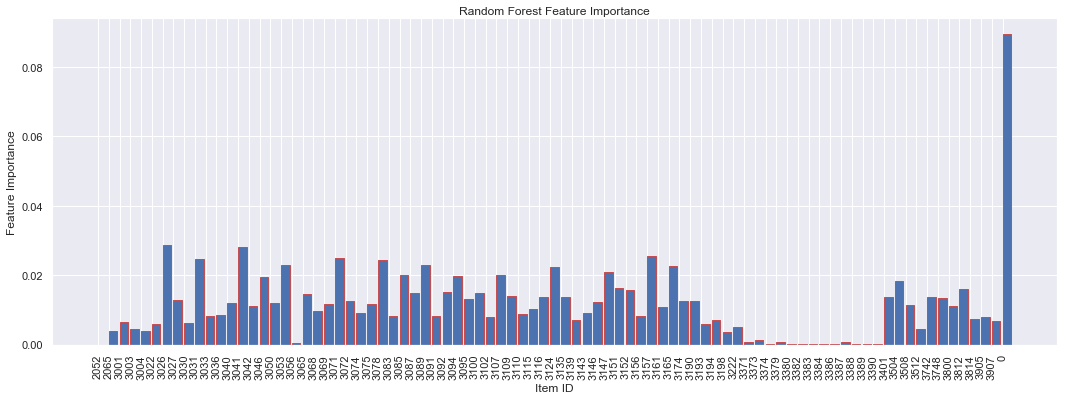

In [133]:
plt.rcParams["figure.figsize"] = (18, 6)
_ = plt.bar(range(num_features),
            gs_forest_1.best_estimator_.feature_importances_,
            edgecolor='r')

items = [str(item) for item in team_items_df.columns.values]
_ = plt.xticks(np.linspace(0, num_features - 1, num_features), items, rotation=90)
_ = plt.title('Random Forest Feature Importance')
_ = plt.ylabel('Feature Importance')
_ = plt.xlabel('Item ID')
plt.savefig('../analysis_images/rf_feature_importances.png')

Here, we can see that the most important feature by far is the empty item slot (item id = 0).

However, feature importance doesn't tell me which category the feature tends towards. This will be tricky to interpret.

In [135]:
forest_results_df = pd.DataFrame(data=gs_forest_1.best_estimator_.feature_importances_,
                                 columns=['Feature Importance'],
                                 index=team_items_df.columns.values)
forest_results_df = forest_results_df.join(overall_item_stats['name'])
forest_results_df.loc[0, 'name'] = 'Empty'

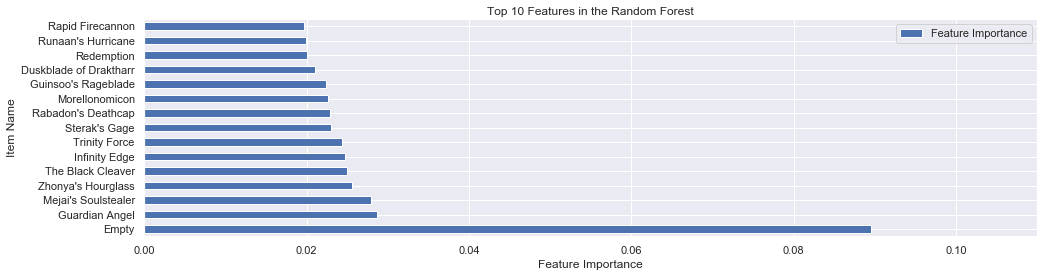

In [136]:
plt.rcParams["figure.figsize"] = (16, 4)
_ = forest_results_df.sort_values('Feature Importance', ascending=False
                                 ).iloc[:15,:].plot(y='Feature Importance', x='name', kind='barh',
                                                    color='b', xlim=[0, 0.11])

_ = plt.xlabel('Feature Importance')
_ = plt.ylabel('Item Name')
_ = plt.title('Top 10 Features in the Random Forest')
plt.savefig('../analysis_images/rf_most_important_features.png')

These are the top 10 features (according to the algorithm). 

This means that having more or less of these 10 items (or lack of item) have the most impact on the result of the game.

However, this plot doesn't indicate if having more of these items will impact make you more or less likely to win. For instance, having more of the Empty item slot on your team definitely decreases your chances of winning, but it the most important feature.

The problem is that just adding one of an item will generally help you win, but this change in win likelihood needs to be compared to a benchmark. We need to know how much better or worse it is to build a given item than any other item.

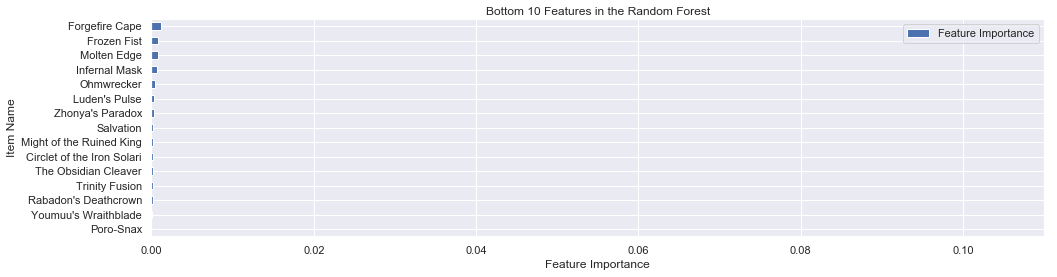

In [137]:
plt.rcParams["figure.figsize"] = (16, 4)
_ = forest_results_df.sort_values('Feature Importance'
                                 ).iloc[:15,:].plot(y='Feature Importance', x='name', kind='barh',
                                                    color='b', xlim=[0, 0.11])

_ = plt.xlabel('Feature Importance')
_ = plt.ylabel('Item Name')
_ = plt.title('Bottom 10 Features in the Random Forest')
plt.savefig('../analysis_images/rf_least_important_features.png')

These are the 10 least importance features.

In [138]:
forest_results_df.sort_values('Feature Importance', ascending=False).iloc[:15,:]

,Feature Importance,name
0,0.089494,Empty
3026,0.028655,Guardian Angel
3041,0.027967,Mejai's Soulstealer
3157,0.025536,Zhonya's Hourglass
3071,0.024940,The Black Cleaver
3031,0.024726,Infinity Edge
3078,0.024295,Trinity Force
3053,0.022943,Sterak's Gage
3089,0.022831,Rabadon's Deathcap
3165,0.022598,Morellonomicon


This is saying that if both teams have the same number of the same items, then there is a 93% chance that team 1 will win? That's an enormous advantage.

In [140]:
prediction_test_data = pd.DataFrame(0, index=range(1),
                                    columns=full_items_df.index.values,
                                    dtype=int)
prediction_test_data.loc[0, 0] = 0
gs_forest_1.predict_proba(prediction_test_data.values)

array([[ 0.07,  0.93]])

To evaluate the performance, can I pick 5 items for each player, predict who wins, and then see how the prediction changes if I add / subtract 1 for a given item?

Try the algorithm again without the 0 column

Try a Logistic regression with and without the 0 column

## Logistic Regression

I will use the same data. Let's see it again.

In [141]:
team_items_df.head()

,2052,2065,3001,3003,3004,3022,3026,3027,3030,3031,...,3508,3512,3742,3748,3800,3812,3814,3905,3907,0
1479671661,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1518508632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1570749651,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1611532468,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0
1988214624,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,-1.0,0.0,0.0,0.0,0.0,1.0


In [142]:
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(team_items_df.values, team_results.values,
                                                            test_size=0.3,
                                                            random_state=13,
                                                            stratify=team_results.values)

In [143]:
%%time
lr_model = LogisticRegression(random_state=13)
lr_model.fit(X_1_train, y_1_train)

Wall time: 109 ms


C:\Users\sebia\Miniconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [144]:
lr_model.score(X_1_train, y_1_train)

0.85482388973966306

In [145]:
lr_model.score(X_1_test, y_1_test)

0.84139080733507976

Wow! This model has a much better accuracy than the previous. 

I suppose Random Forests are not super accurate, but give a good idea of the important features.

To do some hyperparameter tuning, we can consider the penalty, the regularization strength C, and maybe the intercept (fit_intercept)?

Below is the model's intercept (which should be what it outputs if I give it no data?). I would think that, given an empty matrix of item counts, the model should output a 50/50 chance for either side to win.

In [146]:
lr_model.intercept_

array([ 0.07283566])

In [147]:
lr_model.coef_

array([[ 0.        ,  0.65766268,  1.02190472,  0.48707081, -0.078201  ,
         0.80652108,  0.91757005,  0.47937004,  0.36218144,  0.63346333,
         0.85593265,  0.92320056,  0.883718  ,  1.02892569,  1.22685911,
         0.86646365,  0.63503316,  0.97660668,  0.87801211,  0.84864576,
         0.74855065, -0.01926419,  0.86790333,  0.7756194 ,  0.72653694,
         0.84020778,  0.96473669,  1.14857788,  0.99682316,  0.84047933,
         1.30627859,  0.94443672,  0.40009256,  0.82651187,  0.16567989,
         0.79253113,  0.8633695 ,  0.72793493,  0.76559431,  0.88771781,
         0.71822449,  0.7827813 ,  1.20267803,  0.93546826,  0.87589742,
         0.82397687,  0.52710657,  1.02399949,  1.00652277,  0.28793299,
         1.00303339,  0.93288718,  1.0034575 ,  1.03996055,  0.59197464,
         0.5682231 ,  0.60374128,  0.82904554,  0.8082646 ,  0.72557067,
         1.73836562,  0.28932948,  1.41550248,  0.36894264,  1.13531883,
         0.86690107,  1.60952103,  0.51520238,  0.2

Interesting. It looks like the last coefficient (Empty item slot) has a strong negative value, but is not the only negative coefficient.

### Logistic Regression Hyperparameter Tuning

Tune the penalty function, the regularization strength C, and using the intercept. Don't know if I should test different solvers.

In [152]:
lr_model_gs = LogisticRegression(random_state=13)

params={'penalty': ['l1', 'l2'],
        'C': [0.1, 1.0, 10, 100],
        'fit_intercept': [True, False]}

lr_gridsearch = GridSearchCV(lr_model_gs, param_grid=params, cv=5, return_train_score=True)

In [153]:
%%time
lr_gridsearch.fit(X_1_train, y_1_train)

Wall time: 4.68 s


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=13, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.1, 1.0, 10, 100], 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [154]:
lr_gridsearch.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=13, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

The best estimator used l2 penalty, C=1.0, and fit_intercept=True, all default settings.

In [155]:
lr_gridsearch.best_score_

0.8490045941807044

If I want to look at more specific results in the gridsearch.

In [156]:
lr_gridsearch.cv_results_

{'mean_fit_time': array([ 0.02960005,  0.04059997,  0.02459998,  0.0414    ,  0.03699994,
         0.06100001,  0.02639995,  0.05799994,  0.03019996,  0.06080003,
         0.02699995,  0.06700001,  0.03079996,  0.07839999,  0.02819996,
         0.07280002]),
 'mean_score_time': array([ 0.00580001,  0.00639997,  0.002     ,  0.00319996,  0.00879998,
         0.00379996,  0.00140014,  0.00480003,  0.00940003,  0.00059996,
         0.00880003,  0.00879998,  0.00980005,  0.00160007,  0.004     ,
         0.00399995]),
 'mean_test_score': array([ 0.84522716,  0.84686064,  0.84471669,  0.84655436,  0.84880041,
         0.84900459,  0.84706483,  0.84757529,  0.84869832,  0.84859622,
         0.84767739,  0.84767739,  0.84859622,  0.84859622,  0.84777948,
         0.84777948]),
 'mean_train_score': array([ 0.84971923,  0.85257783,  0.84977025,  0.85206737,  0.85385396,
         0.8538795 ,  0.85390506,  0.85387956,  0.85408373,  0.85400714,
         0.85413484,  0.85423693,  0.85400714,  0.854

Mean training scores for the cross-validation were between 0.77 and 0.95, skewed heavily towards the latter.

Mean test scores for the cross-validation were between 0.71 and 0.85, skewed heavily towards the latter.

In [157]:
lr_gridsearch.score(X_1_test, y_1_test)

0.84139080733507976

Unsurprisingly, since the best parameters were the default ones, this model performs identically to the stock Logistic Regression model.

Let's look at the coefficients. They are identical to the other model as well. Nice.

In [158]:
lr_gridsearch.best_estimator_.coef_ - lr_model.coef_

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [160]:
lr_results_df = pd.DataFrame(data=lr_model.coef_[0],
                             columns=['Feature Coefficients'],
                             index=team_items_df.columns.values)
lr_results_df = lr_results_df.join(overall_item_stats['name'])
lr_results_df.loc[0, 'name'] = 'Empty'

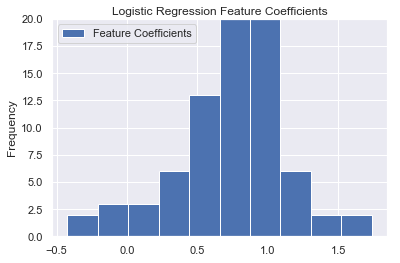

In [161]:
plt.rcParams["figure.figsize"] = (6, 4)
_ = lr_results_df.plot.hist('Feature Coefficients')
_ = plt.title('Logistic Regression Feature Coefficients')
_ = plt.ylim([0, 20])
plt.savefig('../analysis_images/lr_feature_coefs.png')

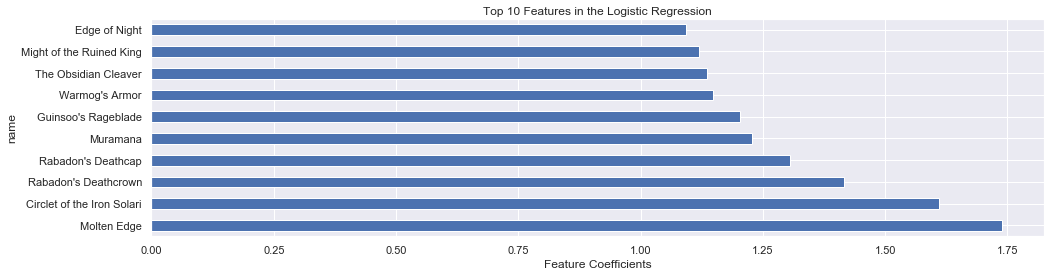

In [162]:
plt.rcParams["figure.figsize"] = (16, 4)
_ = lr_results_df.sort_values('Feature Coefficients', ascending=False
                             ).iloc[0:10, :].plot(y='Feature Coefficients', x='name', kind='barh',
                                                  color='b', legend=False)
_ = plt.title('Top 10 Features in the Logistic Regression')
_ = plt.xlabel('Feature Coefficients')
plt.savefig('../analysis_images/lr_fcoefs_best.png')

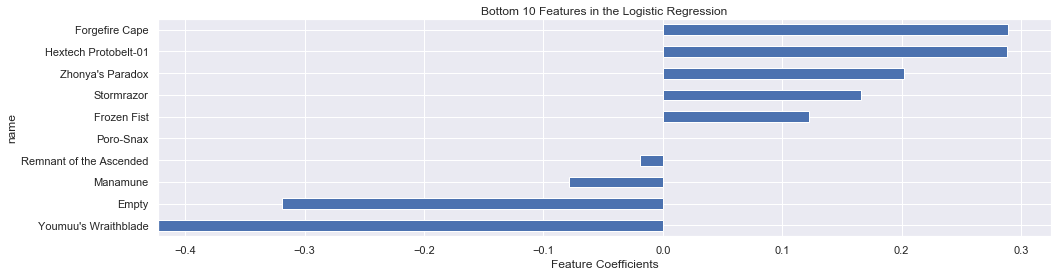

In [163]:
_ = lr_results_df.sort_values('Feature Coefficients', ascending=True
                             ).iloc[0:10, :].plot(y='Feature Coefficients', x='name', kind='barh',
                                                  color='b', legend=False)
_ = plt.title('Bottom 10 Features in the Logistic Regression')
_ = plt.xlabel('Feature Coefficients')
plt.savefig('../analysis_images/lr_fcoefs_worst.png')

So, there are 3 items that this algorithm claims will contribute to losing a game if you buy them.

Indeed, the empty item slot is not even the strongest indicator of losing a game.

In [165]:
# Attach Machine Learning results to the item statistics df
overall_item_stats = overall_item_stats.join(forest_results_df.drop('name', axis=1), how='left'
                                            ).join(lr_results_df.drop('name', axis=1), how='left')

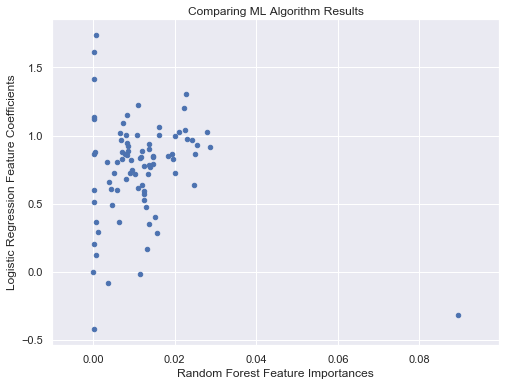

In [167]:
plt.rcParams["figure.figsize"] = (8, 6)
_ = overall_item_stats.plot(x='Feature Importance', y='Feature Coefficients', kind='scatter')
_ = plt.title('Comparing ML Algorithm Results')
_ = plt.ylabel('Logistic Regression Feature Coefficients')
_ = plt.xlabel('Random Forest Feature Importances')
plt.savefig('../analysis_images/ml_model_comparison.png')

The algorithms mostly agree that the items that are important are the items that have a stronger chance to make you win. 

This is to say that there is a strong correlation between items that are more likely to make you win (Logistic Regression Feature Coefficients) and items that were deemed important in the Random Forest (Feature Importances).

There seem to be a set of items that the random forest isn't sensitive to, but the LR can pick out. Are they low pick rate items?

Yes. It seems that the random forest feature importance almost follows a linear relationship with pick rate.

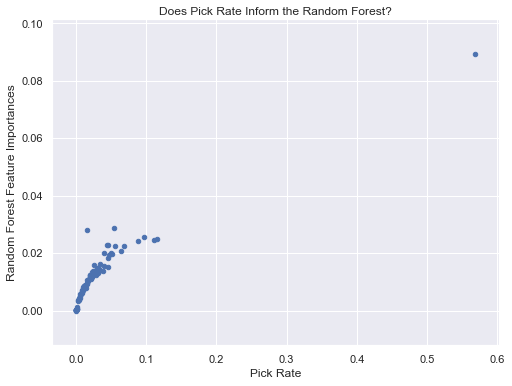

In [169]:
_ = overall_item_stats.plot(x='pick_rate', y='Feature Importance', kind='scatter')
_ = plt.title('Does Pick Rate Inform the Random Forest?')
_ = plt.ylabel('Random Forest Feature Importances')
_ = plt.xlabel('Pick Rate')
plt.savefig('../analysis_images/feature_importance_vs_pick_rate.png')

Okay, clearly nonlinear. But at least following a consistent, monotonically increasing curve.

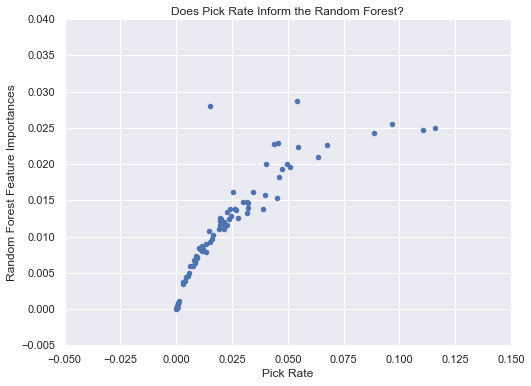

In [170]:
_ = overall_item_stats.plot(x='pick_rate', y='Feature Importance', kind='scatter',
                           xlim=[-0.05, 0.15], ylim=[-0.005, 0.04])
_ = plt.title('Does Pick Rate Inform the Random Forest?')
_ = plt.ylabel('Random Forest Feature Importances')
_ = plt.xlabel('Pick Rate')

In [171]:
# Install a boolean column for visualizations of anomalous items vs the whole
overall_item_stats['Anomalous Win Rate'] = 'blue'
overall_item_stats.loc[(overall_item_stats['full_item'] == True) &
                       (no_edge_cases) &
                       (overall_item_stats['count_unmasked'] > 10) &
                       ((overall_item_stats['wr_unmasked'] - full_item_avg_wr_unmasked).abs() >
                        (overall_item_stats['wr_std_unmasked'] * 1.96)), 'Anomalous Win Rate'] = 'red'

In [173]:
overall_item_stats['Anomalous Win Rate'].value_counts()

blue    226
red      36
Name: Anomalous Win Rate, dtype: int64

Here are the anomalous win-rate items (the cyan graph) from earlier, plotted with their Logistic Regression Feature Coefficients

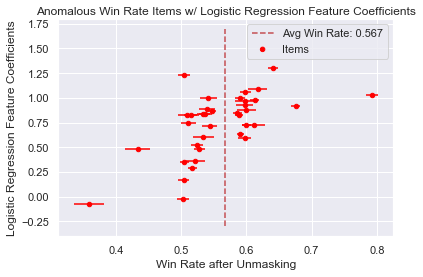

In [239]:
_ = overall_item_stats[(overall_item_stats['full_item'] == True) &
             (no_edge_cases) &
             (overall_item_stats['count_unmasked'] > 10) &
             ((overall_item_stats['wr_unmasked'] - full_item_avg_wr_unmasked).abs() >
              (overall_item_stats['wr_std_unmasked'] * 1.96))].plot(y='Feature Coefficients', x='wr_unmasked',
                                                          kind='scatter', xerr='wr_std_unmasked',
                                                          label='Items', color='red')
_ = plt.plot(np.full(50, full_item_avg_wr_unmasked), np.linspace(-0.30, 1.7, 50), 'r--',
             label=('Avg Win Rate: %0.3f' % full_item_avg_wr_unmasked))

_ = plt.legend()
_ = plt.title('Anomalous Win Rate Items w/ Logistic Regression Feature Coefficients')
_ = plt.xlabel('Win Rate after Unmasking')
_ = plt.ylabel('Logistic Regression Feature Coefficients')
plt.savefig('../analysis_images/lr_coefs_vs_win_rate_anomalous.png')

For reference, here are the rest of the items. You'll notice they sit much closer to the red line, in general.

I should try to color the anomalous points differently.

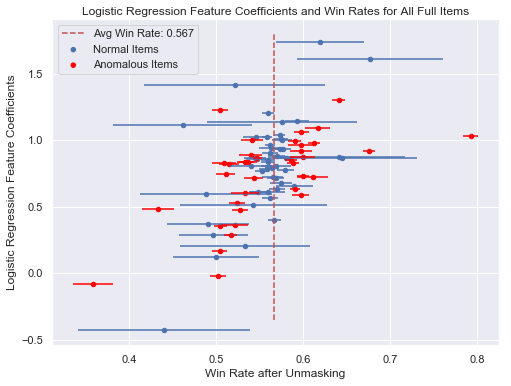

In [240]:
# Set up separate df so the code is cleaner
plotting_df = overall_item_stats[(overall_item_stats['full_item'] == True) &
                       (no_edge_cases) &
                       (overall_item_stats['count_unmasked'] > 10)]
# Set up ax so that I can make multiple plot calls to the same plot
plt.rcParams["figure.figsize"] = (8, 6)
fig, ax = plt.subplots()

# Data
plotting_df[plotting_df['Anomalous Win Rate'] == 'blue'
                ].plot(y='Feature Coefficients', x='wr_unmasked', ax=ax,
                     kind='scatter', label='Normal Items', xerr='wr_std_unmasked', color='b')
plotting_df[plotting_df['Anomalous Win Rate'] == 'red'
                ].plot(y='Feature Coefficients', x='wr_unmasked', ax=ax,
                     kind='scatter', label='Anomalous Items', xerr='wr_std_unmasked', color='red')
# Avg Win Rate Line
plt.plot(np.full(50, full_item_avg_wr_unmasked), np.linspace(-0.35, 1.8, 50), 'r--',
         label=('Avg Win Rate: %0.3f' % full_item_avg_wr_unmasked))

plt.legend()
plt.title('Logistic Regression Feature Coefficients and Win Rates for All Full Items')
plt.xlabel('Win Rate after Unmasking')
plt.ylabel('Logistic Regression Feature Coefficients')
plt.savefig('../analysis_images/lr_coefs_vs_win_rate_all.png')
plt.show()

This result is pretty interesting. At first glance, there seems to be an even spread of feature coefficients vs win rate for the anomalous items. However, there does appear to be a correlation between the win rate and the feature coefficient.

Most of the anomalously high win rate items have pretty strong feature coefficients, and most of the anomalously low win rate items have fairly weak feature coefficients (a few below 0, even!).

However, I have another question now. Not all items are supposed to have the same strength. Some items are stronger, but cost more to buy. Let's visualize this.

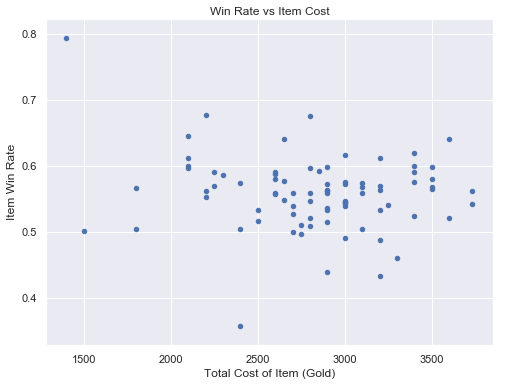

In [232]:
_ = plotting_df.plot('total_gold', 'wr_unmasked', kind='scatter')
_ = plt.xlabel('Total Cost of Item (Gold)')
_ = plt.ylabel('Item Win Rate')
_ = plt.title('Win Rate vs Item Cost')

Win Rate does not have an obvious correlation with item cost.

However, the feature coefficient does correlate with item cost.

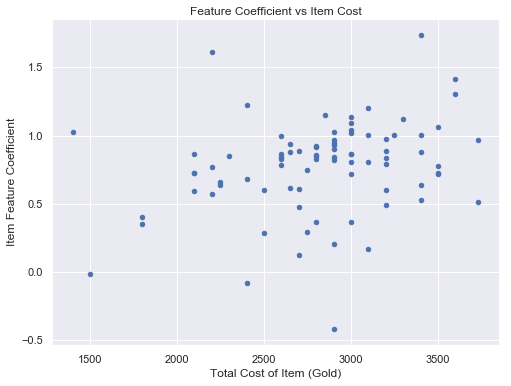

In [177]:
_ = plotting_df.plot('total_gold', 'Feature Coefficients', kind='scatter')
_ = plt.xlabel('Total Cost of Item (Gold)')
_ = plt.ylabel('Item Feature Coefficient')
_ = plt.title('Feature Coefficient vs Item Cost')
plt.savefig('../analysis_images/lr_fcoefs_vs_cost.png')

I want to normalize the Feature Coefficients by the item's cost, then plot that vs win rate.

This is essentially trying to see how much 'bang for your buck' each item has, according to the Logistic Regression.

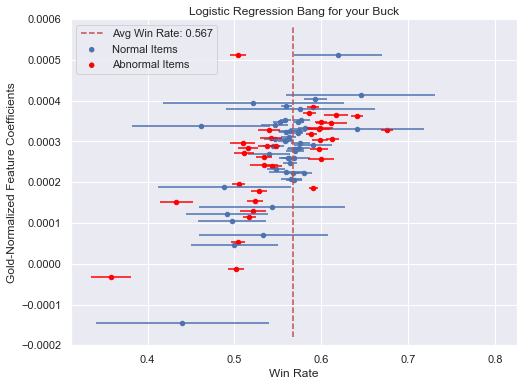

In [241]:
plotting_df.loc[:, 'Gold-Normalized Feature Coefficients'] =\
    plotting_df['Feature Coefficients'] / plotting_df['total_gold']

fig2, ax = plt.subplots()

plotting_df[plotting_df['Anomalous Win Rate'] == 'blue'
                ].plot(x='wr_unmasked', y='Gold-Normalized Feature Coefficients', ax=ax,
                       kind='scatter', xerr='wr_std_unmasked', ylim=[-0.0002, 0.0006],
                       color='b', label='Normal Items')

plotting_df[plotting_df['Anomalous Win Rate'] == 'red'
                ].plot(x='wr_unmasked', y='Gold-Normalized Feature Coefficients', ax=ax,
                       kind='scatter', xerr='wr_std_unmasked', ylim=[-0.0002, 0.0006],
                       color='red', label='Abnormal Items')

plt.plot(np.full(50, full_item_avg_wr_unmasked), np.linspace(-0.00018, 0.00058, 50), 'r--',
         label=('Avg Win Rate: %0.3f' % full_item_avg_wr_unmasked))

plt.title('Logistic Regression Bang for your Buck')
plt.xlabel('Win Rate')
plt.legend()
plt.savefig('../analysis_images/lr_fcoefs_bang_for_buck.png')
plt.show()

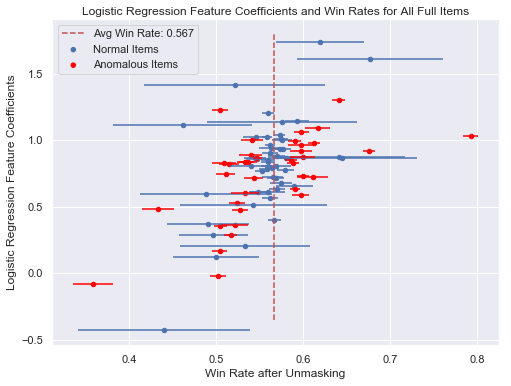

In [242]:
# Compare the gold-normalized plot with the original one
fig

This does not seem too different. I suppose this means that the items' costs are well-balanced.

The most notable outlier (Mejai's Soulstealer, with a post-unmasking win rate of > 0.8), seems not very important to the Logistic Regression. This seems to indicate that the Logistic Regression might favor items that show up more, aka have a large pick rate.

Let's see if this is true.

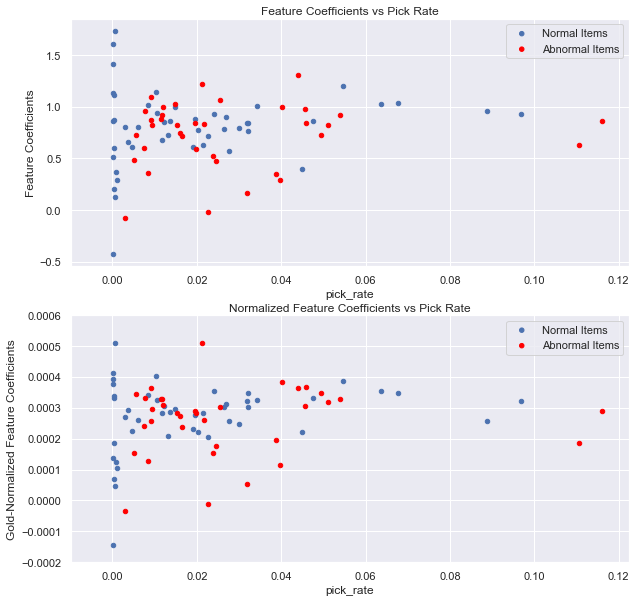

In [235]:
plt.rcParams["figure.figsize"] = (10, 10)
fig3, (ax1, ax2) = plt.subplots(2, 1)

plotting_df[plotting_df['Anomalous Win Rate'] == 'blue'
                ].plot(x='pick_rate', y='Feature Coefficients', ax=ax1,
                       kind='scatter',
                       color='b', label='Normal Items')

plotting_df[plotting_df['Anomalous Win Rate'] == 'red'
                ].plot(x='pick_rate', y='Feature Coefficients', ax=ax1,
                       kind='scatter',
                       color='red', label='Abnormal Items')
ax1.set_title('Feature Coefficients vs Pick Rate')

plotting_df[plotting_df['Anomalous Win Rate'] == 'blue'
                ].plot(x='pick_rate', y='Gold-Normalized Feature Coefficients', ax=ax2,
                       kind='scatter', ylim=[-0.0002, 0.0006],
                       color='b', label='Normal Items')

plotting_df[plotting_df['Anomalous Win Rate'] == 'red'
                ].plot(x='pick_rate', y='Gold-Normalized Feature Coefficients', ax=ax2,
                       kind='scatter', ylim=[-0.0002, 0.0006],
                       color='red', label='Abnormal Items')

ax2.set_title('Normalized Feature Coefficients vs Pick Rate')
plt.show()

We can see that there is a slight correlation betwen Feature Coefficients and Pick Rate.

In [181]:
plotting_df[plotting_df['Anomalous Win Rate'] == 'red'
           ][['name', 'wr_unmasked', 'Feature Coefficients']].sort_values('Feature Coefficients', ascending=False)

,name,wr_unmasked,Feature Coefficients
item_id,,,
3089,Rabadon's Deathcap,0.640936,1.306279
3042,Muramana,0.504084,1.226859
3814,Edge of Night,0.616949,1.091928
3812,Death's Dance,0.598302,1.063528
3041,Mejai's Soulstealer,0.792793,1.028926
3156,Maw of Malmortius,0.541587,1.003033
3085,Runaan's Hurricane,0.590441,0.996823
3053,Sterak's Gage,0.612429,0.976607
3907,Spellbinder,0.598095,0.963534


I should check and make sure I understand what the Logistic Regression Coefficients mean.

If I give the model an array of 0s, I expect it predict the intercept.

If I give it all 0s and a 1 in column 3089, I should expect a 1.61?

Feature generation

timing data for each item

Look at confusion matrix

Adjust LR threshold based on confusion matrix. The rates of false positives and false negatives are nearly identical. That's good!

In [182]:
confusion_matrix(y_1_train, lr_model.predict(X_1_train))

array([[4190,  712],
       [ 710, 4183]], dtype=int64)

In [183]:
confusion_matrix(y_1_test, lr_model.predict(X_1_test))

array([[1761,  341],
       [ 325, 1772]], dtype=int64)

In [184]:
confusion_matrix(y_1_train, lr_gridsearch.predict(X_1_train))

array([[4190,  712],
       [ 710, 4183]], dtype=int64)

In [185]:
confusion_matrix(y_1_test, lr_gridsearch.predict(X_1_test))

array([[1761,  341],
       [ 325, 1772]], dtype=int64)

This indicates that the amount of false positives (0,1) is about twice the number of false negatives (1,0).

So, I should increase the threshold slightly, so I guess negative more.

### Logistic Regression Round 2

The intercept doesn't make any sense, and the biggest predictor of a match's result is how many empty item slots each team has.

I want to run the algorithm again without the empty item column. This should improve the model's gauging of individual items, maybe at the expense of prediction accuracy. 

It should also allow me to set the intercept to be something meaningful.

In [186]:
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(team_items_df.drop(0, axis=1).values,
                                                            team_results.values,
                                                            test_size=0.3,
                                                            random_state=13,
                                                            stratify=team_results.values)

In [187]:
lr_model_no_0 = LogisticRegression(random_state=13)

In [188]:
%%time
lr_model_no_0.fit(X_2_train, y_2_train)

Wall time: 95 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=13, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [189]:
lr_model_no_0.score(X_2_train, y_2_train)

0.83940786115364985

In [190]:
lr_model_no_0.score(X_2_test, y_2_test)

0.82876875446534892

The model performs similarly to it's predecessor, who had access to empty item slot counts.

The intercept still doesn't make sense, though.

From the line below, predicting a game with all 0s for each item shows a 51.3% win chance for team 1. This probability should be 50%, but that isn't too bad.

In [191]:
lr_model_no_0.intercept_

array([ 0.05506165])

In [193]:
lr_model_no_0.predict_proba(np.zeros(num_features-1).reshape(1,-1))

array([[ 0.48623807,  0.51376193]])

In [194]:
lr_model_no_intercept = LogisticRegression(random_state=13, fit_intercept=False)
lr_model_no_intercept.fit(X_2_train, y_2_train)
lr_model_no_intercept.intercept_

0.0

In [195]:
lr_model_no_intercept.score(X_2_train, y_2_train)

0.83940786115364985

In [196]:
lr_model_no_intercept.score(X_2_test, y_2_test)

0.8297213622291022

In [198]:
lr_model_no_intercept.predict_proba(np.zeros(num_features-1).reshape(1,-1))

array([[ 0.5,  0.5]])

Disabling the intercept gets me the probabilities I want (50/50) for the empty input.

Okay, now we can tune the hyperparameters for this Logistic Regression.

In [199]:
lr_gs_no_intercept = LogisticRegression(random_state=13, fit_intercept=False)

params={'penalty': ['l1', 'l2'],
        'C': [0.1, 1.0, 10, 100]}

lr_gridsearch_no_int = GridSearchCV(lr_gs_no_intercept, param_grid=params, cv=5)

In [200]:
%%time
lr_gridsearch_no_int.fit(X_2_train, y_2_train)

Wall time: 2.56 s


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=13, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.1, 1.0, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

The gridsearch found the best parameters to be C = 1.0 and a penalty of L2, the default options again.

In [201]:
lr_gridsearch_no_int.score(X_2_test, y_2_test)

0.82733984281971895

All prediction accuracies are still in the low 80%s.

Let's look at the results.

In [203]:
lr_results_no_int = pd.DataFrame(data=lr_model_no_intercept.coef_[0],
                                 columns=['Feature Coefficients no Intercept'],
                                 index=team_items_df.drop(0, axis=1).columns.values)
lr_results_no_int = lr_results_no_int.join(overall_item_stats['name'], how='left')

In [204]:
overall_item_stats = overall_item_stats.join(lr_results_no_int.drop('name', axis=1), how='left')

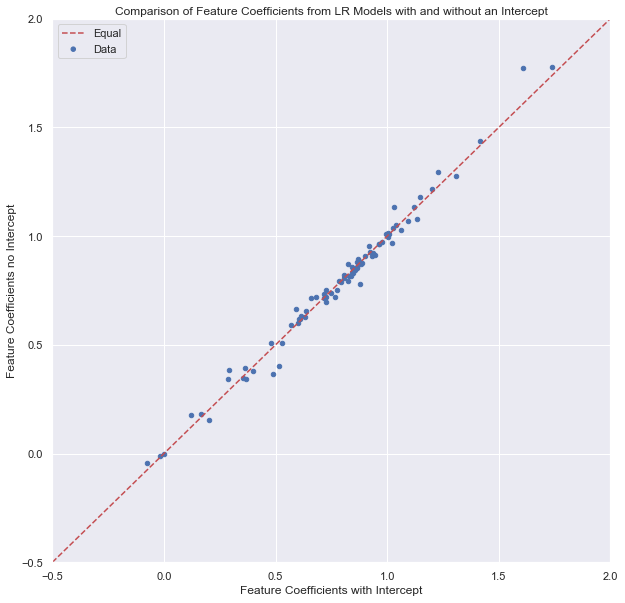

In [205]:
_ = overall_item_stats.plot(x='Feature Coefficients', y='Feature Coefficients no Intercept',
                  kind='scatter', label='Data', xlim=[-0.5, 2.0], ylim=[-0.5, 2.0])
_ = plt.plot(np.linspace(-0.50, 2.0, 50), np.linspace(-0.50, 2.0, 50), 'r--', label='Equal')
_ = plt.title('Comparison of Feature Coefficients from LR Models with and without an Intercept')
_ = plt.legend()
_ = plt.xlabel('Feature Coefficients with Intercept')
plt.savefig('../analysis_images/lr_fcoefs_comparison.png')

This plot compares the feature coefficients from Logistic Regression models fit with and without an intercept.

If a dot is on the red line, then the coefficient didn't change from one model to the other. 

If a dot is below the red line, then the coefficient decreased from the model with the intercept to the model without.

If a dot is above the red line, then the coefficient increased from the model with the intercept to the model without.

It seems like most coefficients went up a bit.

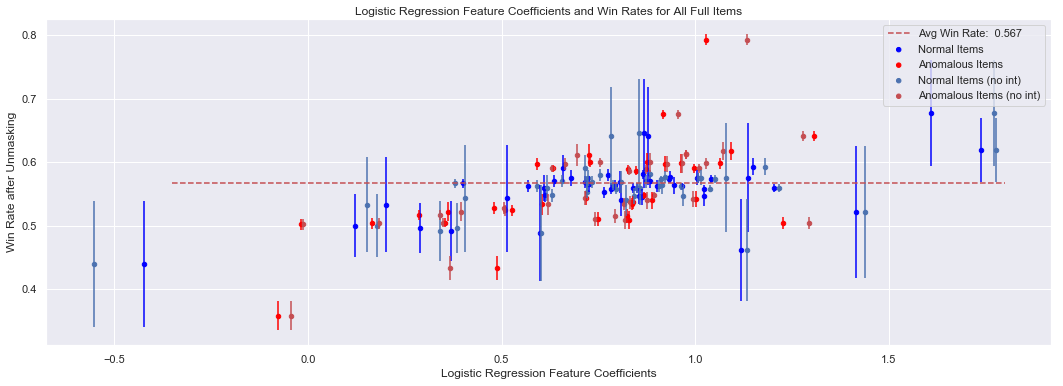

In [243]:
# Set up separate df so the code is cleaner
plotting_df = overall_item_stats[(overall_item_stats['full_item'] == True) &
                       (no_edge_cases) &
                       (overall_item_stats['count_unmasked'] > 10)]

# Set up ax so that I can make multiple plot calls to the same plot
plt.rcParams["figure.figsize"] = (18, 6)
fig, ax = plt.subplots()

# Data
plotting_df[plotting_df['Anomalous Win Rate'] == 'blue'
                ].plot(x='Feature Coefficients', y='wr_unmasked', ax=ax,
                     kind='scatter', label='Normal Items', yerr='wr_std_unmasked', color='blue')
plotting_df[plotting_df['Anomalous Win Rate'] == 'red'
                ].plot(x='Feature Coefficients', y='wr_unmasked', ax=ax,
                     kind='scatter', label='Anomalous Items', yerr='wr_std_unmasked', color='red')
plotting_df[plotting_df['Anomalous Win Rate'] == 'blue'
                ].plot(x='Feature Coefficients no Intercept', y='wr_unmasked', ax=ax,
                     kind='scatter', label='Normal Items (no int)', yerr='wr_std_unmasked', color='b')
plotting_df[plotting_df['Anomalous Win Rate'] == 'red'
                ].plot(x='Feature Coefficients no Intercept', y='wr_unmasked', ax=ax,
                     kind='scatter', label='Anomalous Items (no int)', yerr='wr_std_unmasked', color='r')

# Avg Win Rate Line
plt.plot(np.linspace(-0.35, 1.8, 50), np.full(50, full_item_avg_wr_unmasked), 'r--',
         label=('Avg Win Rate:  %0.3f' % full_item_avg_wr_unmasked))

plt.legend()
plt.title('Logistic Regression Feature Coefficients and Win Rates for All Full Items')
plt.ylabel('Win Rate after Unmasking')
plt.xlabel('Logistic Regression Feature Coefficients')
plt.show()

The plot of all the coefficients is a bit much to look at.

Look at the distribution of new coefficients.

Looking at the change in coefficients, it seems like none of them changed too much.

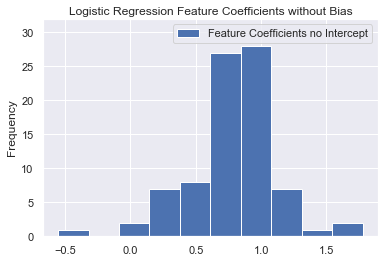

In [237]:
plt.rcParams["figure.figsize"] = (6, 4)
_ = plotting_df[['Feature Coefficients no Intercept']].plot.hist('Feature Coefficients (no Intercept)')
_ = plt.title('Logistic Regression Feature Coefficients without Bias')
_ = plt.ylim([0, 32])
plt.savefig('../analysis_images/lr_feature_coefs_sans_bias.png')

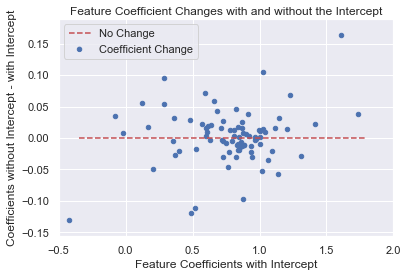

In [238]:
plotting_df.loc[:,'Feature Coef Difference'] = plotting_df['Feature Coefficients no Intercept'] -\
                                                            plotting_df['Feature Coefficients']

_ = plotting_df.plot(y='Feature Coef Difference', x='Feature Coefficients',
                     kind='scatter', label='Coefficient Change', xlim=[-0.5, 2.0])
_ = plt.plot(np.linspace(-0.35, 1.8, 50), np.full(50, 0), 'r--', label='No Change')
_ = plt.title('Feature Coefficient Changes with and without the Intercept')
_ = plt.xlabel('Feature Coefficients with Intercept')
_ = plt.ylabel('Coefficients without Intercept - with Intercept')
_ = plt.legend()

plt.savefig('../analysis_images/lr_fcoef_changes.png')

The overall distribution of Feature Coefficients and Win Rates looks pretty similar with and without the intercept in the Logistic Regression model.

There might be a slight correlation, indicating that removing the intercept tended to increase small feature coefficients more than large feature coefficients.

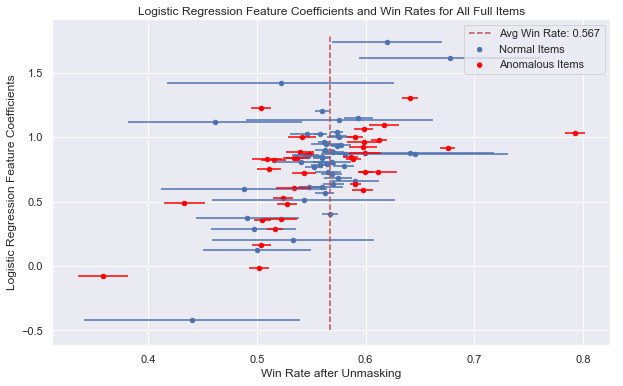

In [246]:
plt.rcParams["figure.figsize"] = (10, 6)
fig, ax = plt.subplots()

# Data
plotting_df[plotting_df['Anomalous Win Rate'] == 'blue'
                ].plot(y='Feature Coefficients', x='wr_unmasked', ax=ax,
                     kind='scatter', label='Normal Items', xerr='wr_std_unmasked', color='b')
plotting_df[plotting_df['Anomalous Win Rate'] == 'red'
                ].plot(y='Feature Coefficients', x='wr_unmasked', ax=ax,
                     kind='scatter', label='Anomalous Items', xerr='wr_std_unmasked', color='red')
# Avg Win Rate Line
plt.plot(np.full(50, full_item_avg_wr_unmasked), np.linspace(-0.5, 1.8, 50), 'r--',
         label=('Avg Win Rate: %0.3f' % full_item_avg_wr_unmasked))

plt.legend()
plt.title('Logistic Regression Feature Coefficients and Win Rates for All Full Items')
plt.xlabel('Win Rate after Unmasking')
plt.ylabel('Logistic Regression Feature Coefficients')
plt.show()

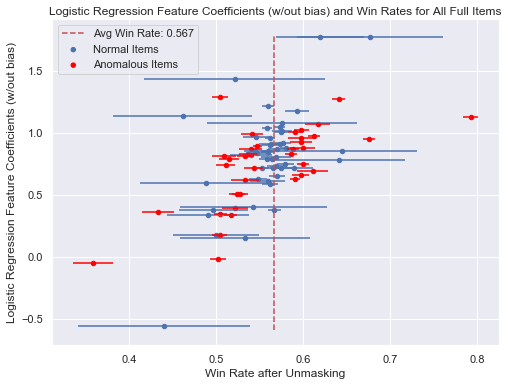

In [247]:
plt.rcParams["figure.figsize"] = (8, 6)
fig, ax = plt.subplots()

# Data
plotting_df[plotting_df['Anomalous Win Rate'] == 'blue'
                ].plot(y='Feature Coefficients no Intercept', x='wr_unmasked', ax=ax,
                     kind='scatter', label='Normal Items', xerr='wr_std_unmasked', color='b')
plotting_df[plotting_df['Anomalous Win Rate'] == 'red'
                ].plot(y='Feature Coefficients no Intercept', x='wr_unmasked', ax=ax,
                     kind='scatter', label='Anomalous Items', xerr='wr_std_unmasked', color='red')
# Avg Win Rate Line
plt.plot(np.full(50, full_item_avg_wr_unmasked), np.linspace(-.59, 1.8, 50), 'r--',
         label=('Avg Win Rate: %0.3f' % full_item_avg_wr_unmasked))

plt.legend()
plt.title('Logistic Regression Feature Coefficients (w/out bias) and Win Rates for All Full Items')
plt.xlabel('Win Rate after Unmasking')
plt.ylabel('Logistic Regression Feature Coefficients (w/out bias)')
plt.savefig('../analysis_images/lr_fcoefs_vs_win_rate_sans_bias.png')
plt.show()

## Recommendations: What to Change

There are 4 sets of suspect items.

Items that have statistically high / low win rates compared to the mean.

Items that have logistic regression feature coefficients that are rather high / low (taking top / bottom 10).

The intersection of the unusually high-valued sets is a good first pass, and their union is a good second pass for what to nerf.

The intersection of the unusually low-valued sets is a good first pass, and their union is a good second pass for what to buff.

Jungle items should be manually checked, since their win rates do not sit around the average from the rest of the items.

### Too Weak

From the Logistic Regression

In [217]:
plotting_df.sort_values('Feature Coefficients no Intercept')[[
    'name', 'Feature Coefficients no Intercept', 'wr_unmasked', 'wr_std_unmasked'
]].head(10)

,name,Feature Coefficients no Intercept,wr_unmasked,wr_std_unmasked
item_id,,,,
3388,Youmuu's Wraithblade,-0.552671,0.440000,0.099277
3004,Manamune,-0.042799,0.358314,0.023205
3069,Remnant of the Ascended,-0.011586,0.502027,0.009190
3386,Zhonya's Paradox,0.153156,0.533333,0.074370
3387,Frozen Fist,0.177752,0.500000,0.049507
3095,Stormrazor,0.182799,0.504072,0.008527
3379,Infernal Mask,0.342135,0.491071,0.047238
3152,Hextech Protobelt-01,0.342155,0.517013,0.007310
3401,Remnant of the Aspect,0.349244,0.504921,0.007564


Checking the red / blue counterparts of the jungle items in this list.

Most jungle items probably shouldn't have been flagged by the win rate statistical analysis.

I have no idea why 1419 has such a low Feature Coefficient compared to 1416, especially with a higher win rate.

1402 has a significantly lower win rate than 1414, so I believe that should be made stronger.

From the win rate statistical analysis

In [223]:
# REDO THIS

abnormal_items_um[8:]

item_id
3812              Death's Dance
3907                Spellbinder
3036     Lord Dominik's Regards
3174      Athene's Unholy Grail
3031              Infinity Edge
3085         Runaan's Hurricane
3094           Rapid Firecannon
3504              Ardent Censer
3071          The Black Cleaver
3115             Nashor's Tooth
3156          Maw of Malmortius
3110               Frozen Heart
3075                  Thornmail
3508             Essence Reaver
3193        Gargoyle Stoneplate
3027                Rod of Ages
3146           Hextech Gunblade
3030            Hextech GLP-800
3152       Hextech Protobelt-01
3143             Randuin's Omen
3068               Sunfire Cape
3194              Adaptive Helm
3401      Remnant of the Aspect
3042                   Muramana
3095                 Stormrazor
3069    Remnant of the Ascended
3003          Archangel's Staff
3004                   Manamune
Name: name, dtype: object

The intersection of these two lists is:


### Too Strong

From the Logistic Regression

In [224]:
plotting_df.sort_values('Feature Coefficients no Intercept', ascending=False)[[
    'name', 'Feature Coefficients no Intercept', 'wr_unmasked', 'wr_std_unmasked'
]].head(10)

,name,Feature Coefficients no Intercept,wr_unmasked,wr_std_unmasked
item_id,,,,
3371,Molten Edge,1.776585,0.619565,0.050616
3383,Circlet of the Iron Solari,1.772785,0.677419,0.083959
3374,Rabadon's Deathcrown,1.438454,0.521739,0.104159
3042,Muramana,1.294546,0.504084,0.009224
3089,Rabadon's Deathcap,1.277772,0.640936,0.007337
3124,Guinsoo's Rageblade,1.216625,0.559745,0.006426
3083,Warmog's Armor,1.179776,0.593083,0.013326
3389,Might of the Ruined King,1.134447,0.461538,0.079827
3041,Mejai's Soulstealer,1.134042,0.792793,0.009067


From the win rate statistical analysis

In [114]:
abnormal_items_um[0:8]

item_id
3041    Mejai's Soulstealer
3050     Zeke's Convergence
3089     Rabadon's Deathcap
3026         Guardian Angel
3031          Infinity Edge
3087           Statikk Shiv
3053          Sterak's Gage
3151      Liandry's Torment
Name: name, dtype: object

The intersection of these lists is 

Rabadon's Deathcap

Liandry's Torment

Sterak's Gage

Infinity Edge